In [31]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

데이터 불러오기

In [32]:
import pandas as pd

DATA_IN_PATH = './data/sample_data/data/'
df = pd.read_csv(DATA_IN_PATH+'/kakaobank.csv', header = 0)
train_data = pd.read_csv(DATA_IN_PATH+'/train.csv', header = 0)
test_data = pd.read_csv(DATA_IN_PATH+'/test.csv', header = 0)

정규 표현식

In [33]:
import re

def apply_regular_expression(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hangul.sub('', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result

In [34]:
df['content'][0]

'입출금통장 만들 때 인증방법을 바꾸려 했는데 이전으로 가는 버튼이 없네요. 처음부터 다시 만들려 했더니 이미 계좌개설이 진행 중이라서 다시 들어가도 셀카인증으로 돼요. 다시 만들려서 30일 기다려야 하네요. 이것 빼고는 다 좋아요. 선택수정하게끔 해주셨으면 합니다.'

In [35]:
apply_regular_expression(df['content'][0])

'입출금통장 만들 때 인증방법을 바꾸려 했는데 이전으로 가는 버튼이 없네요 처음부터 다시 만들려 했더니 이미 계좌개설이 진행 중이라서 다시 들어가도 셀카인증으로 돼요 다시 만들려서 일 기다려야 하네요 이것 빼고는 다 좋아요 선택수정하게끔 해주셨으면 합니다'

형태소 분석

In [36]:
from konlpy.tag import Okt
from collections import Counter

In [37]:
okt = Okt()  # 명사 형태소 추출 함수
nouns = okt.nouns(apply_regular_expression(df['content'][0]))

Corpus 생성

In [38]:
corpus = "".join(df['content'].tolist())

In [39]:
# 정규 표현식 적용
apply_regular_expression(corpus)

'입출금통장 만들 때 인증방법을 바꾸려 했는데 이전으로 가는 버튼이 없네요 처음부터 다시 만들려 했더니 이미 계좌개설이 진행 중이라서 다시 들어가도 셀카인증으로 돼요 다시 만들려서 일 기다려야 하네요 이것 빼고는 다 좋아요 선택수정하게끔 해주셨으면 합니다자꾸 핸드폰 인증하라고 반복되는데 그때마다 매번 인증해야해서 번거롭기도하고 너무 짜증납니다 앱을 새로 깔라는 안내를 받고 새로 깔아도 마찬가지이고 왜 갑자기 이런 현상이 계속되는지 기술팀에서 조속히 해결해주시기 바랍니다 핸드폰은 몇년 계속 사용하고 있는데 기기변경하라는게 납득이 안되네요전체적으로 편리하고 좋네요 이용할 줄만 안다면 대체로 스스로 웬만한 건 처리할 수 있도록 해놓고 무엇보다 스마트출금을 한정적이지만 편의점 자동화기기에서 수수료 면제로 이용할 수 있다는 점도 정말 좋구요 다만 발급 관련해서 정말 급한 건을 기다려야 한다는 것이 치명적이라면 치명적으로 느껴질 때가 있군요편리하게 잘 사용하고 있어요 만족스럽습니다 그래도 개선했으면 좋을것같은 것들을 적어봅니다 우선 첫화면에서 통장의 순서를 직접 정할수 있었으면 좋겠어요 모임통장 같은건 밑으로 내리고 제가 모으고 있는 통장이나 적금들을 위에서 보고싶거든요 그리고 자산 액수 숨기는 기능도 있었으면 좋겠어요 되도록이면 첫 화면에서 간단하게 버튼 하나로 숨겨지고 보여지고 했으면 좋겠네요 감사합니다사용도 편리하고 캐시백도 유용해요 특히 타은행보다 예적금이자가 높아서 진짜 좋아요 기준금리 오르자마자 바로 딱 적용된 은행은 카뱅이었어요 오프라인은행이 없어 처음엔 의심도 되고 우려도 있었는데 이젠 주변에 안쓰고 계신분들에게 추천해서 많이 개설하셨어요 수수료 없는 것도 엄청 큰 매리트여서 무료수수료는 계속 이어졌으면 좋겠네요 앞으로도 좋은 혜택 계속 이어지면 좋겠어요이번에 본인인증 주기적으로 하래서 했는데 신분증 촬영시 카메라 셔터음 소리가 소음수준으로 큽니다 기존에 아무것도 손대지 않아도 셔터음이 이렇게 큰적이 없는데 카카오에서는 임의로 소리를 키우는 셋팅을 한 건지

명사 형태소 추출

In [40]:
nouns = okt.nouns(apply_regular_expression(corpus))

In [41]:
# 빈도 탐색
counter = Counter(nouns)

In [42]:
counter.most_common(10)

[('계좌', 1425),
 ('사용', 1412),
 ('카카오', 1321),
 ('은행', 1297),
 ('앱', 1176),
 ('뱅크', 1148),
 ('인증', 961),
 ('왜', 849),
 ('계속', 759),
 ('오류', 739)]

한글자 명사 제거

In [43]:
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(10)

[('계좌', 1425),
 ('사용', 1412),
 ('카카오', 1321),
 ('은행', 1297),
 ('뱅크', 1148),
 ('인증', 961),
 ('계속', 759),
 ('오류', 739),
 ('신분증', 727),
 ('이체', 676)]

불용어 사전

In [44]:
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
stopwords[:10]

[['휴'],
 ['아이구'],
 ['아이쿠'],
 ['아이고'],
 ['어'],
 ['나'],
 ['우리'],
 ['저희'],
 ['따라'],
 ['의해']]

In [45]:
kakao_stopwords = ['카카오', '카카오뱅크', '카뱅', '카카오 뱅크', '뱅크']
for word in kakao_stopwords:
    stopwords.append(word)

BoW 벡터 생성

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', text)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns

vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(df['content'].tolist())
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

In [47]:
# 단어 리스트
word_list

['가가',
 '가게',
 '가계부',
 '가구',
 '가기',
 '가까이',
 '가끔',
 '가나',
 '가능',
 '가능도',
 '가능성',
 '가도',
 '가독성',
 '가드',
 '가뜩이나',
 '가라',
 '가랏',
 '가량',
 '가렴',
 '가령',
 '가로',
 '가면',
 '가바',
 '가사',
 '가산',
 '가상',
 '가세',
 '가쉽',
 '가슴',
 '가시',
 '가안',
 '가야',
 '가업',
 '가오',
 '가왜',
 '가요',
 '가용',
 '가유',
 '가이드',
 '가입',
 '가입자',
 '가장',
 '가정교육',
 '가족',
 '가즈',
 '가지',
 '가지가지',
 '가지연',
 '가짐',
 '가짜',
 '가치',
 '가타',
 '가편',
 '가폰',
 '각각',
 '각도',
 '각성',
 '각종',
 '간겁',
 '간격',
 '간결',
 '간다',
 '간단',
 '간단명료',
 '간소',
 '간소화',
 '간수',
 '간이',
 '간접',
 '간지',
 '간쳔해',
 '간편',
 '간혹',
 '갈기',
 '갈남',
 '갈등',
 '갈라',
 '갈리',
 '갈리아',
 '갈문',
 '갈수',
 '갈수록',
 '갈이',
 '갈텔데',
 '감기',
 '감당',
 '감독',
 '감동',
 '감사',
 '감솨',
 '감솨해',
 '감수',
 '감안',
 '감연',
 '감옥',
 '감점',
 '감정',
 '감지',
 '감치',
 '감탄',
 '감히',
 '갑갑갑',
 '갑자기',
 '갑작',
 '갑질',
 '갑카뱅',
 '갑햇',
 '갓카오',
 '강남',
 '강남구',
 '강도',
 '강력',
 '강롁',
 '강민지',
 '강아지',
 '강요',
 '강점',
 '강제',
 '강조',
 '강추',
 '강추앱',
 '강츄',
 '강화',
 '개구리',
 '개굿',
 '개그',
 '개극혐',
 '개꼴',
 '개꿀',
 '개꿀임',
 '개꿀잼',
 '개념',
 '개도',
 '개돼지',
 '개떡',
 '개똥',
 '개망',
 '개명',

In [48]:
# 각 단어가 전체 리뷰중에 등장한 총 횟수
count_list

array([ 4,  6, 56, ...,  1,  1,  1], dtype=int64)

In [49]:
# 각 단어의 리뷰별 등장 횟수
bow_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [50]:
bow_vect.shape

(17644, 5912)

In [51]:
# "단어" - "총 등장 횟수" Matching

word_count_dict = dict(zip(word_list, count_list))
word_count_dict

{'가가': 4,
 '가게': 6,
 '가계부': 56,
 '가구': 1,
 '가기': 11,
 '가까이': 7,
 '가끔': 7,
 '가나': 3,
 '가능': 45,
 '가능도': 1,
 '가능성': 1,
 '가도': 6,
 '가독성': 1,
 '가드': 6,
 '가뜩이나': 2,
 '가라': 2,
 '가랏': 1,
 '가량': 1,
 '가렴': 1,
 '가령': 1,
 '가로': 6,
 '가면': 8,
 '가바': 1,
 '가사': 3,
 '가산': 1,
 '가상': 8,
 '가세': 1,
 '가쉽': 1,
 '가슴': 1,
 '가시': 1,
 '가안': 12,
 '가야': 4,
 '가업': 1,
 '가오': 1,
 '가왜': 1,
 '가요': 147,
 '가용': 2,
 '가유': 1,
 '가이드': 1,
 '가입': 274,
 '가입자': 9,
 '가장': 39,
 '가정교육': 2,
 '가족': 23,
 '가즈': 2,
 '가지': 54,
 '가지가지': 1,
 '가지연': 1,
 '가짐': 6,
 '가짜': 2,
 '가치': 6,
 '가타': 2,
 '가편': 2,
 '가폰': 1,
 '각각': 3,
 '각도': 2,
 '각성': 2,
 '각종': 7,
 '간겁': 1,
 '간격': 1,
 '간결': 1,
 '간다': 5,
 '간단': 24,
 '간단명료': 4,
 '간소': 2,
 '간소화': 4,
 '간수': 1,
 '간이': 1,
 '간접': 1,
 '간지': 1,
 '간쳔해': 1,
 '간편': 62,
 '간혹': 3,
 '갈기': 14,
 '갈남': 1,
 '갈등': 4,
 '갈라': 1,
 '갈리': 1,
 '갈리아': 5,
 '갈문': 1,
 '갈수': 4,
 '갈수록': 2,
 '갈이': 9,
 '갈텔데': 1,
 '감기': 1,
 '감당': 6,
 '감독': 2,
 '감동': 7,
 '감사': 38,
 '감솨': 1,
 '감솨해': 1,
 '감수': 2,
 '감안': 1,
 '감연': 1,
 '감옥': 1,
 '감점': 1,
 '감

TF-IDF 변환

In [52]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [53]:
print(tf_idf_vect.shape)

(17644, 5912)


In [54]:
# 첫 번째 리뷰에서의 단어 중요도(TF-IDF 값) -- 0이 아닌 것만 출력
print(tf_idf_vect[0])

  (0, 5283)	0.1703483512040859
  (0, 4888)	0.2027351422643294
  (0, 4775)	0.22226575031199433
  (0, 4639)	0.2690179264772734
  (0, 4126)	0.20549168301109041
  (0, 4035)	0.3005616346245384
  (0, 3971)	0.2827427003232053
  (0, 2793)	0.22226575031199433
  (0, 2698)	0.3143196264958531
  (0, 2633)	0.23906863175907167
  (0, 2123)	0.2378621593825126
  (0, 2051)	0.2036304731779527
  (0, 1046)	0.4963560532369233
  (0, 344)	0.13441274020410124
  (0, 150)	0.16663443636884556


In [55]:
# 첫 번째 리뷰에서 모든 단어의 중요도 -- 0인 값까지 포함
print(tf_idf_vect[0].toarray().shape)
print(tf_idf_vect[0].toarray())

(1, 5912)
[[0. 0. 0. ... 0. 0. 0.]]


“벡터” - “단어” mapping

In [56]:
vect.vocabulary_

{'입출금': 4126,
 '통장': 5283,
 '인증': 4035,
 '방법': 2051,
 '이전': 3971,
 '버튼': 2123,
 '처음': 4888,
 '다시': 1046,
 '계좌': 344,
 '개설': 150,
 '진행': 4775,
 '중이': 4639,
 '셀카': 2698,
 '선택': 2633,
 '수정': 2793,
 '자꾸': 4146,
 '핸드폰': 5673,
 '반복': 2007,
 '그때': 611,
 '매번': 1673,
 '기도': 713,
 '안내': 3145,
 '마찬가지': 1594,
 '갑자기': 102,
 '현상': 5724,
 '계속': 337,
 '기술': 733,
 '조속': 4491,
 '해결': 5644,
 '사용': 2466,
 '변경': 2166,
 '납득': 886,
 '전체': 4334,
 '이용': 3954,
 '대체로': 1186,
 '스스로': 2837,
 '처리': 4882,
 '무엇': 1847,
 '스마트': 2831,
 '출금': 5023,
 '한정': 5616,
 '편의점': 5417,
 '자동화': 4155,
 '기기': 707,
 '수수료': 2780,
 '면제': 1742,
 '점도': 4354,
 '정말': 4390,
 '다만': 1036,
 '발급': 2020,
 '관련': 459,
 '치명': 5070,
 '라면': 1439,
 '개선': 149,
 '우선': 3698,
 '화면': 5784,
 '순서': 2809,
 '직접': 4753,
 '모임': 1788,
 '적금': 4291,
 '자산': 4169,
 '액수': 3239,
 '기능': 710,
 '이면': 3917,
 '하나로': 5543,
 '캐시': 5131,
 '백도': 2088,
 '은행': 3841,
 '이자': 3966,
 '진짜': 4768,
 '기준금리': 755,
 '바로': 1970,
 '적용': 4296,
 '오프라인': 3570,
 '의심': 3881,
 '우려': 3689,
 '주변': 45

In [57]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'...')

{4126: '입출금', 5283: '통장', 4035: '인증', 2051: '방법', 3971: '이전', 2123: '버튼', 4888: '처음', 1046: '다시', 34...


감성 분류 – Logistic Regression

<AxesSubplot:>

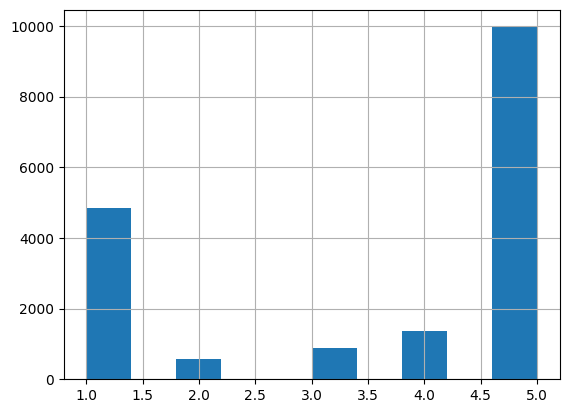

In [58]:
df['rating'].hist()

In [63]:
train_test_data = [df]

label_mapping = {1 : 0, 2 : 0, 3 : 0, 4 : 1, 5 : 1}

for dataset in train_test_data:
    dataset['label'] = dataset['rating'].map(label_mapping)

In [64]:
df.head()

,rating,content,label
0,3,입출금통장 만들 때 인증방법을 바꾸려 했는데 이전으로 가는 버튼이 없네요. 처음부터...,0
1,3,자꾸 핸드폰 인증하라고 반복되는데 그때마다 매번 인증해야해서 번거롭기도하고 너무 짜...,0
2,5,전체적으로 편리하고 좋네요. 이용할 줄만 안다면 대체로 스스로 웬만한 건 처리할 수...,1
3,5,편리하게 잘 사용하고 있어요! 만족스럽습니다 그래도 개선했으면 좋을것같은 것들을 적...,1
4,5,"사용도 편리하고, 캐시백도 유용해요. 특히 타은행보다 예,적금이자가 높아서 진짜 좋...",1


In [83]:
df["label"].value_counts()

1    11321
0     6323
Name: label, dtype: int64

Training set / Test set 나누기

In [84]:
from sklearn.model_selection import train_test_split

x = tf_idf_vect
y = df['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

In [85]:
x_train.shape, y_train.shape

((12350, 5912), (12350,))

In [86]:
x_test.shape, y_test.shape

((5294, 5912), (5294,))

모델 학습

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# fit in training set
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# predict in test set
y_pred = lr.predict(x_test)

분류 결과 평가

In [88]:
# classification result for test set

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

accuracy: 0.87
precision: 0.85
recall: 0.96
F1: 0.90


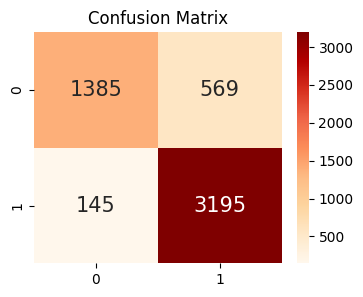

In [89]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

샘플링 재조정

In [90]:
# 모델이 긍정으로 치우친 경향이 있어 재조정
df['label'].value_counts()

1    11321
0     6323
Name: label, dtype: int64

In [91]:
positive_random_idx = df[df['label']==1].sample(6323, random_state=12).index.tolist()
negative_random_idx = df[df['label']==0].sample(6323, random_state=12).index.tolist()

In [92]:
random_idx = positive_random_idx + negative_random_idx
x = tf_idf_vect[random_idx]
y = df['label'][random_idx]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [93]:
x_train.shape, y_train.shape

((9484, 5912), (9484,))

In [94]:
x_test.shape, y_test.shape

((3162, 5912), (3162,))

모델 재학습

In [95]:
lr2 = LogisticRegression(random_state = 0)
lr2.fit(x_train, y_train)
y_pred = lr2.predict(x_test)

In [96]:
# classification result for test set

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

accuracy: 0.86
precision: 0.83
recall: 0.92
F1: 0.87


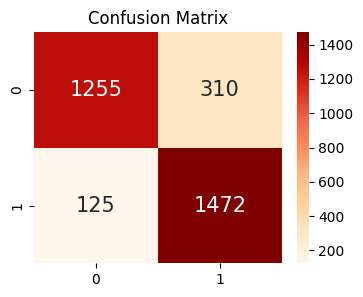

['./data/sample_data/data/model.pkl']

In [97]:
# confusion matrix

from sklearn.metrics import confusion_matrix
import joblib

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

joblib.dump(lr2, DATA_IN_PATH + 'model.pkl')

긍정/부정 키워드 분석

In [98]:
lr2.coef_

array([[-0.00883702, -0.72299546,  0.12515327, ...,  0.        ,
        -0.61602449,  0.21387977]])

단어의 계수 시각화

<BarContainer object of 5912 artists>

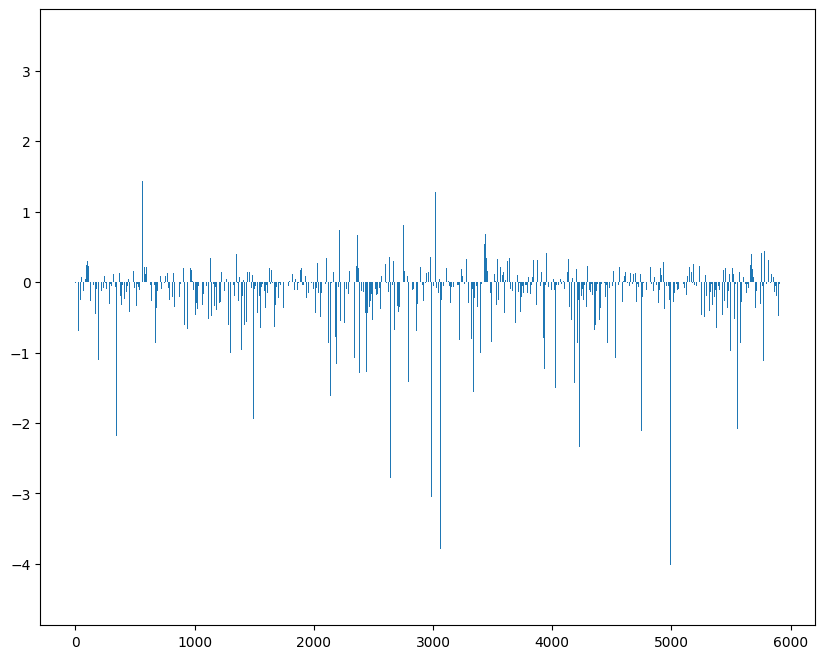

In [99]:
# print logistic regression's coef

plt.figure(figsize=(10, 8))
plt.bar(range(len(lr2.coef_[0])), lr2.coef_[0])

In [100]:
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[:5])
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[-5:])
# enumerate: 인덱스 번호와 컬렉션의 원소를 tuple형태로 반환함

[(3.476254674588226, 4979), (2.2752421321778495, 1675), (2.1998590808969776, 3124), (2.0247220790761733, 2780), (1.854246515469639, 5411)]
[(-3.961239036562385, 3370), (-3.9641166423847842, 3543), (-4.017805698691493, 4993), (-4.107397100970681, 2956), (-4.474923176200622, 5397)]


In [101]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = False)
coef_pos_index

[(3.476254674588226, 4979),
 (2.2752421321778495, 1675),
 (2.1998590808969776, 3124),
 (2.0247220790761733, 2780),
 (1.854246515469639, 5411),
 (1.5675879215312418, 4390),
 (1.460153066994128, 71),
 (1.4379272307490187, 562),
 (1.4306294691332346, 712),
 (1.3866924043626663, 1639),
 (1.2796829156340874, 3021),
 (1.2720298314162548, 5013),
 (1.2408161846805406, 3059),
 (1.2374224609076239, 2809),
 (1.211873230908529, 5004),
 (1.1533535701347106, 563),
 (1.126872238938835, 2681),
 (1.1069906953673707, 5721),
 (1.0963598232397775, 1212),
 (1.0941994819546303, 4291),
 (1.0778940184539942, 3602),
 (1.0705850384324198, 5641),
 (1.057423209244945, 2961),
 (1.0460778745209218, 4745),
 (1.034992215961517, 1036),
 (1.0066985678716638, 3993),
 (0.9859889988456016, 2466),
 (0.9710842344884932, 5720),
 (0.9603918177600719, 1991),
 (0.9565870725454079, 4980),
 (0.9345456835425374, 3234),
 (0.9146357049457349, 88),
 (0.8961001099565422, 4186),
 (0.8823718715813088, 1370),
 (0.8694940733671975, 182),


In [102]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
invert_index_vectorizer

{4126: '입출금',
 5283: '통장',
 4035: '인증',
 2051: '방법',
 3971: '이전',
 2123: '버튼',
 4888: '처음',
 1046: '다시',
 344: '계좌',
 150: '개설',
 4775: '진행',
 4639: '중이',
 2698: '셀카',
 2633: '선택',
 2793: '수정',
 4146: '자꾸',
 5673: '핸드폰',
 2007: '반복',
 611: '그때',
 1673: '매번',
 713: '기도',
 3145: '안내',
 1594: '마찬가지',
 102: '갑자기',
 5724: '현상',
 337: '계속',
 733: '기술',
 4491: '조속',
 5644: '해결',
 2466: '사용',
 2166: '변경',
 886: '납득',
 4334: '전체',
 3954: '이용',
 1186: '대체로',
 2837: '스스로',
 4882: '처리',
 1847: '무엇',
 2831: '스마트',
 5023: '출금',
 5616: '한정',
 5417: '편의점',
 4155: '자동화',
 707: '기기',
 2780: '수수료',
 1742: '면제',
 4354: '점도',
 4390: '정말',
 1036: '다만',
 2020: '발급',
 459: '관련',
 5070: '치명',
 1439: '라면',
 149: '개선',
 3698: '우선',
 5784: '화면',
 2809: '순서',
 4753: '직접',
 1788: '모임',
 4291: '적금',
 4169: '자산',
 3239: '액수',
 710: '기능',
 3917: '이면',
 5543: '하나로',
 5131: '캐시',
 2088: '백도',
 3841: '은행',
 3966: '이자',
 4768: '진짜',
 755: '기준금리',
 1970: '바로',
 4296: '적용',
 3570: '오프라인',
 3881: '의심',
 3689: '우려',
 4585: '주

만족 키워드 TOP 20

In [103]:
for coef in coef_pos_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])

최고 3.476254674588226
매우 2.2752421321778495
아주 2.1998590808969776
수수료 2.0247220790761733
편리 1.854246515469639
정말 1.5675879215312418
간편 1.460153066994128
굿굿 1.4379272307490187
기대 1.4306294691332346
만족 1.3866924043626663
심플 1.2796829156340874
추천 1.2720298314162548
쓰기 1.2408161846805406
순서 1.2374224609076239
쵝오 1.211873230908529
굿굿굿 1.1533535701347106
세상 1.126872238938835
혁신 1.1069906953673707
더욱 1.0963598232397775
적금 1.0941994819546303


부정 키워드 TOP 20

In [104]:
for coef in coef_neg_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])

페미 -4.474923176200622
신분증 -4.107397100970681
최악 -4.017805698691493
오류 -3.9641166423847842
업데이트 -3.961239036562385
쓰레기 -3.7953498553644343
계속 -3.7817619784703225
인증 -3.691242411429765
삭제 -3.3450276356483966
실행 -3.233610079985393
다운 -3.1557406876480845
에러 -3.140245603620938
다시 -3.137480158651462
미성년 -3.0897184867100767
실망 -3.046034766408876
접속 -3.027933433735236
광고 -2.963022523821912
기업 -2.886255760077666
해명 -2.798716342391422
설치 -2.7761158196506184
